In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad
from optims.SBS_particles import SBS_particles
from optims.extended_function import extended_function

np.random.seed(42)

In [2]:
class Fun:
  def __init__(self) -> None:
        super().__init__()
        self.n = 0

  def __call__(self, x: np.ndarray) -> float:
      self.n += 1
      if np.abs(x) <= 0.5:
          return np.array([1])
      else:
          return np.exp((np.abs(x) - 0.5))

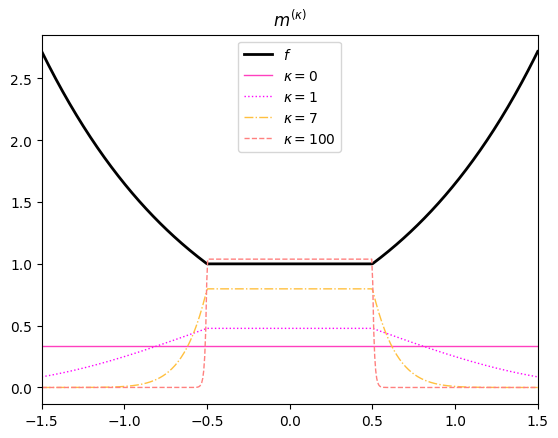

In [6]:
import matplotlib

cmap = matplotlib.colormaps["spring"]

bounds = np.array([(-1.5, 1.5)])
F = Fun()

x = np.linspace(bounds[0, 0], bounds[0, 1], 500)
plt.plot(x, [F(np.array([x_i])) for x_i in x], c=(0, 0, 0), label="$f$", linewidth=2.0)

colors = [cmap(0.25), cmap(1), cmap(0.75), cmap(0.5)]
line_styles = ["-", ":", "-.", "--"]
for k, c , ls in zip([0, 1, 7, 100], colors, line_styles):
  integral = quad(lambda x : np.exp(-k*F(np.array([ x ]).reshape(1, -1))), bounds[0, 0], bounds[0, 1])[0]
  m_k = lambda x : np.exp(-k*F(x)) / integral
  plt.plot(x, [m_k(np.array([x_i])) for x_i in x], ls, c=c, label=f"$\kappa = {k}$", linewidth=1)

plt.xlim(bounds[0, 0], bounds[0, 1])
plt.legend()
plt.title("$m^{(\kappa)}$")

plt.savefig("m_k_2d.pdf", bbox_inches="tight")